# 

<center>

# INTRODUCTION TO AI AND TEXT ANALYTICS - EMATM0067
# INTRODUCTION TO AI - COURSEWORK
</center>

## Overview of the Task:

- As a part of coursework, Downloaded the Penguins dataset (`penguin.csv`) from the [ematm0067](https://github.com/ematm0067/2023_24/blob/main/coursework/penguins.csv) repository. Also, knows as Palmer Penguins Data. 
- This dataset contains the information about three different penguins.
- This task includes exploration of the dataset, visualisations and developing predictive models to predict the type of penguins by using suitable AI-ML algorithms.

### To set up the environment for analysis, it is important to begin with Importing necessary libraries:
*Let's begin the coursework, by installing all the libraries needed:*
- libraries needed for pre-processing to prediction 

In [2]:
import warnings
warnings.filterwarnings('ignore') ## to ignore the warnings
import pandas as pd  ## dataset loading
import numpy as np 
import matplotlib.pyplot as plt ## visualisations
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans

### Loading Data
- Loading the penguins data into python environment using pandas dataframe.
- Using *head()* function to check the contents of the data

In [3]:
## loading dataset
data = pd.read_csv('penguins.csv')
data.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

# 1. Data Exploration:
*Steps to understanding the data*
- The following steps gives an overview of size and shape of the data.

In [45]:
data.shape  #size and shape of the data

(344, 9)

Dataset consisted of 344 rows and 9 columns
- Variables are saved in columns.
- Observations are saved in rows.

In [64]:
data.size ## 344 x 9

3096

### Data Preprocessing
- Check the null values before proceeding deeper exploration.
- If missing values found do the suitable imputation if needed.

In [9]:
data.isnull()

rowid  species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    False    False   False           False          False              False   
1    False    False   False           False          False              False   
2    False    False   False           False          False              False   
3    False    False   False            True           True               True   
4    False    False   False           False          False              False   
..     ...      ...     ...             ...            ...                ...   
339  False    False   False           False          False              False   
340  False    False   False           False          False              False   
341  False    False   False           False          False              False   
342  False    False   False           False          False              False   
343  False    False   False           False          False              False   

     body_mass_g    sex   year  
0          False  False  False  
1          False  False  False  
2          False  False  False  
3           True   True  False  
4          False  False  False  
..           ...    ...    ...  
339        False  False  False  
340        False  False  False  
341        False  False  False  
342        False  False  False  
343        False  False  False  

[344 rows x 9 columns]

In [8]:
data.isnull().sum() ## count of missing values in each column

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

It is always important to identify the missing values before doing any kind of analysis.
Because, missing data can effect the accuracy and model's performance.

- Identifying null values helps in checking the quality of data
- Handling the missing values with appropriate imputation methods, or dropping them.

From this data, only few missing values are there.which is less then 20. Missing values are present in 4 numerical and 1 catergorical columns. I think ignoring this data of missing values cannot affect analysis.

Decided to impute the missing values:

In [15]:
## Imputing numerical columns with mean
n_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
data[n_columns] = data[n_columns].fillna(data[n_columns].mean())

In [22]:
data.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64

Importing categorical values using *mode()* function imputes with the most frequent value present in the 'Sex' column.
This model is not acceptable if we need good performance model, especially if the data is not evenly distributed.

It is better to drop:

In [24]:
print(data['sex'].unique())

['male' 'female' nan]


In [25]:
data.dropna(subset=['sex'])

rowid    species     island  bill_length_mm  bill_depth_mm  \
0        1     Adelie  Torgersen            39.1           18.7   
1        2     Adelie  Torgersen            39.5           17.4   
2        3     Adelie  Torgersen            40.3           18.0   
4        5     Adelie  Torgersen            36.7           19.3   
5        6     Adelie  Torgersen            39.3           20.6   
..     ...        ...        ...             ...            ...   
339    340  Chinstrap      Dream            55.8           19.8   
340    341  Chinstrap      Dream            43.5           18.1   
341    342  Chinstrap      Dream            49.6           18.2   
342    343  Chinstrap      Dream            50.8           19.0   
343    344  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  year  
0                181.0       3750.0    male  2007  
1                186.0       3800.0  female  2007  
2                195.0       3250.0  female  2007  
4                193.0       3450.0  female  2007  
5                190.0       3650.0    male  2007  
..                 ...          ...     ...   ...  
339              207.0       4000.0    male  2009  
340              202.0       3400.0  female  2009  
341              193.0       3775.0    male  2009  
342              210.0       4100.0    male  2009  
343              198.0       3775.0  female  2009  

[333 rows x 9 columns]

In [27]:
data.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64

In [46]:
data.count() ## count of values

rowid                344
species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [47]:
data['island'].value_counts()  ## count of penguins in each island

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

- Less number of penguins are recorded in Torgersen island.

In [48]:
data.info() # summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


- *info()* function provides the summary of dataset, including count of non-null values and type of data presented in each column i.e. int, float, etc..

In [49]:
data.describe(include='all') # statistical summary 

rowid species  island  bill_length_mm  bill_depth_mm  \
count   344.000000     344     344      342.000000     342.000000   
unique         NaN       3       3             NaN            NaN   
top            NaN  Adelie  Biscoe             NaN            NaN   
freq           NaN     152     168             NaN            NaN   
mean    172.500000     NaN     NaN       43.921930      17.151170   
std      99.448479     NaN     NaN        5.459584       1.974793   
min       1.000000     NaN     NaN       32.100000      13.100000   
25%      86.750000     NaN     NaN       39.225000      15.600000   
50%     172.500000     NaN     NaN       44.450000      17.300000   
75%     258.250000     NaN     NaN       48.500000      18.700000   
max     344.000000     NaN     NaN       59.600000      21.500000   

        flipper_length_mm  body_mass_g   sex         year  
count          342.000000   342.000000   333   344.000000  
unique                NaN          NaN     2          NaN  
top                   NaN          NaN  male          NaN  
freq                  NaN          NaN   168          NaN  
mean           200.915205  4201.754386   NaN  2008.029070  
std             14.061714   801.954536   NaN     0.818356  
min            172.000000  2700.000000   NaN  2007.000000  
25%            190.000000  3550.000000   NaN  2007.000000  
50%            197.000000  4050.000000   NaN  2008.000000  
75%            213.000000  4750.000000   NaN  2009.000000  
max            231.000000  6300.000000   NaN  2009.000000

- *describe()* function gives the basic descriptive and statistical summary like mean, standard deviation etc.. for each column

In [50]:
data.describe().transpose()

count         mean         std     min       25%      50%  \
rowid              344.0   172.500000   99.448479     1.0    86.750   172.50   
bill_length_mm     342.0    43.921930    5.459584    32.1    39.225    44.45   
bill_depth_mm      342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   
year               344.0  2008.029070    0.818356  2007.0  2007.000  2008.00   

                       75%     max  
rowid               258.25   344.0  
bill_length_mm       48.50    59.6  
bill_depth_mm        18.70    21.5  
flipper_length_mm   213.00   231.0  
body_mass_g        4750.00  6300.0  
year               2009.00  2009.0

In [51]:
data.describe(include=['O'])

species  island   sex
count      344     344   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       152     168   168

In [52]:
data.nunique()  ##distinct values count in each column

rowid                344
species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
year                   3
dtype: int64

- There are three different species in three islands and they recorded the observesations for 3 years.

In [53]:
#data['species'].nunique() ## for count
data['species'].unique() ## to see what are those 3

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [20]:
island_genders =data[['island', 'sex']]
island_genders.head()

island     sex
0  Torgersen    male
1  Torgersen  female
2  Torgersen  female
3  Torgersen     NaN
4  Torgersen  female

In [58]:
data.iloc[:,[1,6]] ## selecting particular columns..
#choosing body mass and penguin

species  body_mass_g
0       Adelie       3750.0
1       Adelie       3800.0
2       Adelie       3250.0
3       Adelie          NaN
4       Adelie       3450.0
..         ...          ...
339  Chinstrap       4000.0
340  Chinstrap       3400.0
341  Chinstrap       3775.0
342  Chinstrap       4100.0
343  Chinstrap       3775.0

[344 rows x 2 columns]

In [66]:
data.groupby(["species"]).count()

rowid  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
species                                                                      
Adelie       152     152             151            151                151   
Chinstrap     68      68              68             68                 68   
Gentoo       124     124             123            123                123   

           body_mass_g  sex  year  
species                            
Adelie             151  146   152  
Chinstrap           68   68    68  
Gentoo             123  119   124

In [67]:
data.groupby(["sex", "species"])["flipper_length_mm"].mean()

sex     species  
female  Adelie       187.794521
        Chinstrap    191.735294
        Gentoo       212.706897
male    Adelie       192.410959
        Chinstrap    199.911765
        Gentoo       221.540984
Name: flipper_length_mm, dtype: float64

In [63]:
data.iloc[3:4] ## how it is..imputed

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3      4  Adelie  Torgersen             NaN            NaN                NaN   

   body_mass_g  sex  year  
3          NaN  NaN  2007

In [ ]:
## just to check how it is imputed::
data.iloc[1,0]

In [14]:
data.drop(columns=['rowid'], inplace=True)   ### lets drop rowid..its just aserial number

In [15]:
data.head(2)  ##  data ATER DROPPING ROWID

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007

In [16]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Correlation matrix
correlation_matrix = data_encoded.corr()
print("Correlation Matrix:\n", correlation_matrix)  ## caterorial values to num

Correlation Matrix:
                    bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.234635           0.656856   
bill_depth_mm           -0.234635       1.000000          -0.582472   
flipper_length_mm        0.656856      -0.582472           1.000000   
body_mass_g              0.595720      -0.471339           0.871302   
year                     0.054371      -0.060073           0.168799   
species_Chinstrap        0.449678       0.320685          -0.177957   
species_Gentoo           0.489611      -0.821666           0.862698   
island_Dream             0.036188       0.455932          -0.416423   
island_Torgersen        -0.381137       0.268633          -0.291225   
sex_male                 0.319192       0.353939           0.238785   

                   body_mass_g      year  species_Chinstrap  species_Gentoo  \
bill_length_mm        0.595720  0.054371           0.449678        0.489611   
bill_depth_mm        -0.471339 -0.06007

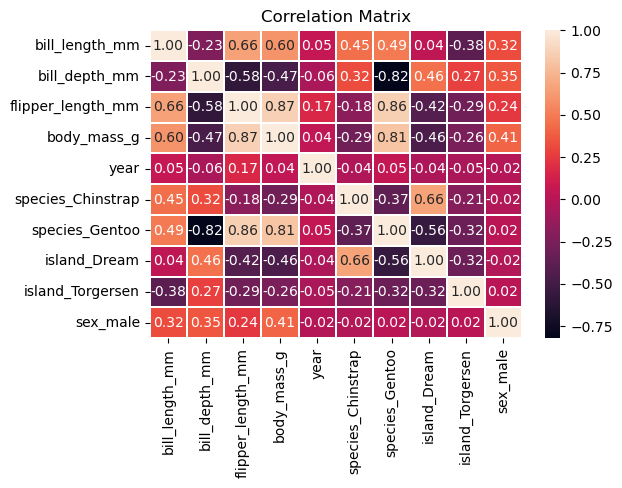

In [17]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.3) ## just 2 numbers after plot
plt.title('Correlation Matrix')
plt.show()

In [18]:
data_encoded.head(2) ## how it encoded

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
0            39.1           18.7              181.0       3750.0  2007   
1            39.5           17.4              186.0       3800.0  2007   

   species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  sex_male  
0                  0               0             0                 1         1  
1                  0               0             0                 1         0

In [19]:
sns.__version__

'0.12.2'

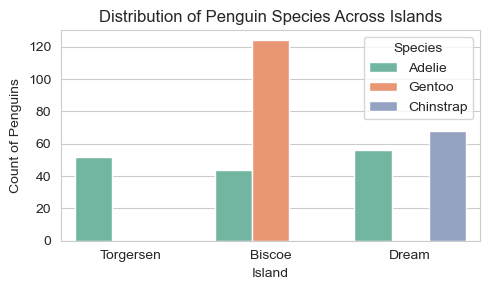

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualization 1: Distribution of Penguin Species across Islands
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='island', hue='species', palette='Set2')
plt.title('Distribution of Penguin Species Across Islands')
plt.xlabel('Island')
plt.ylabel('Count of Penguins')
plt.legend(title='Species')
plt.tight_layout()
plt.show()

<Figure size 300x100 with 0 Axes>

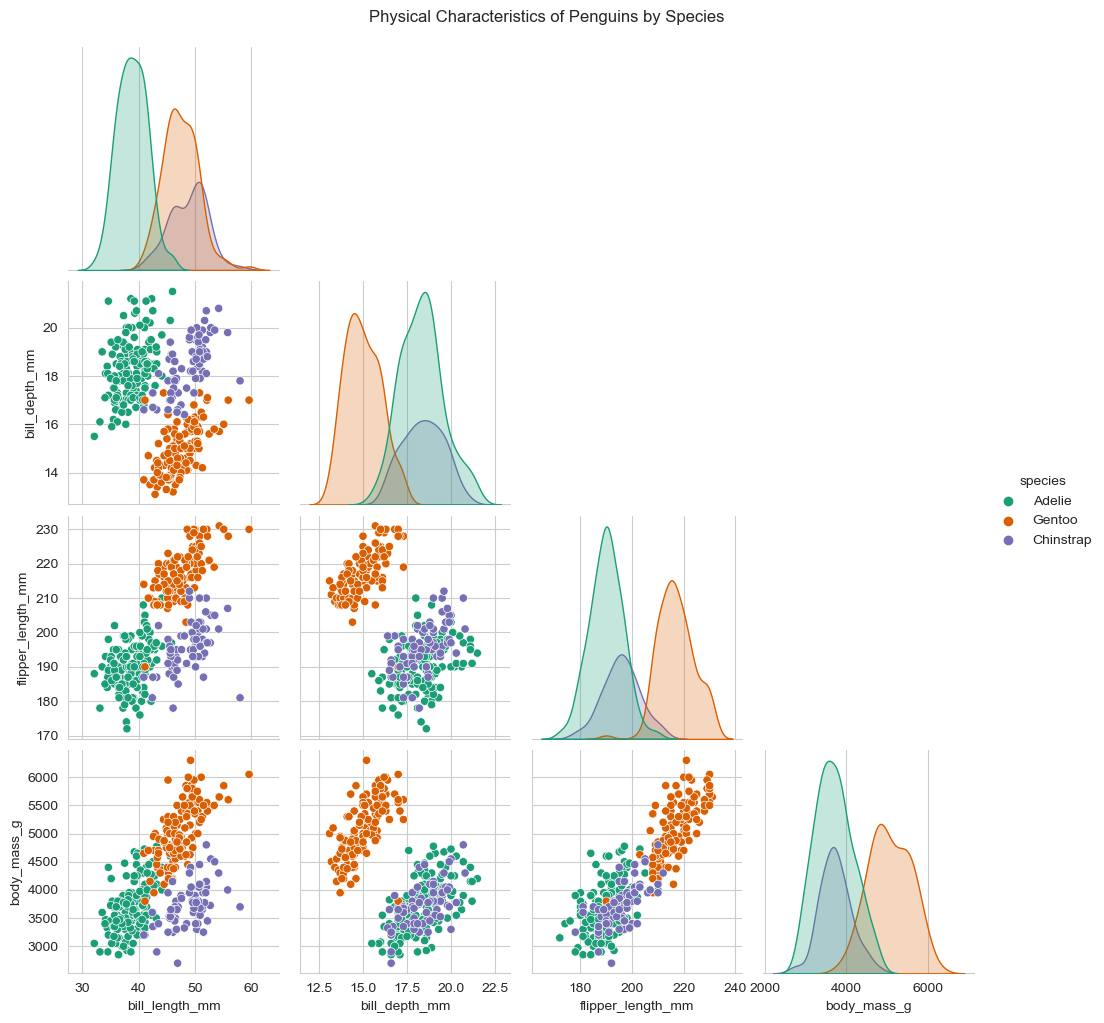

In [21]:
# Visualization 2: Comparison of Physical Characteristics Across Species
# For this, we'll create a pair plot to visualize the relationships between all physical characteristics
plt.figure(figsize=(3,1))
sns.pairplot(data, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], palette='Dark2', corner=True)
plt.suptitle('Physical Characteristics of Penguins by Species', y=1.02)
plt.show()

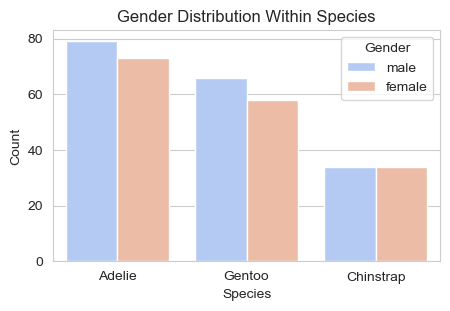

In [22]:
# Visualization: Gender Distribution Within Each Species
plt.figure(figsize=(5,3))
sns.countplot(x='species', hue='sex', data=data, palette='coolwarm')
plt.title('Gender Distribution Within Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

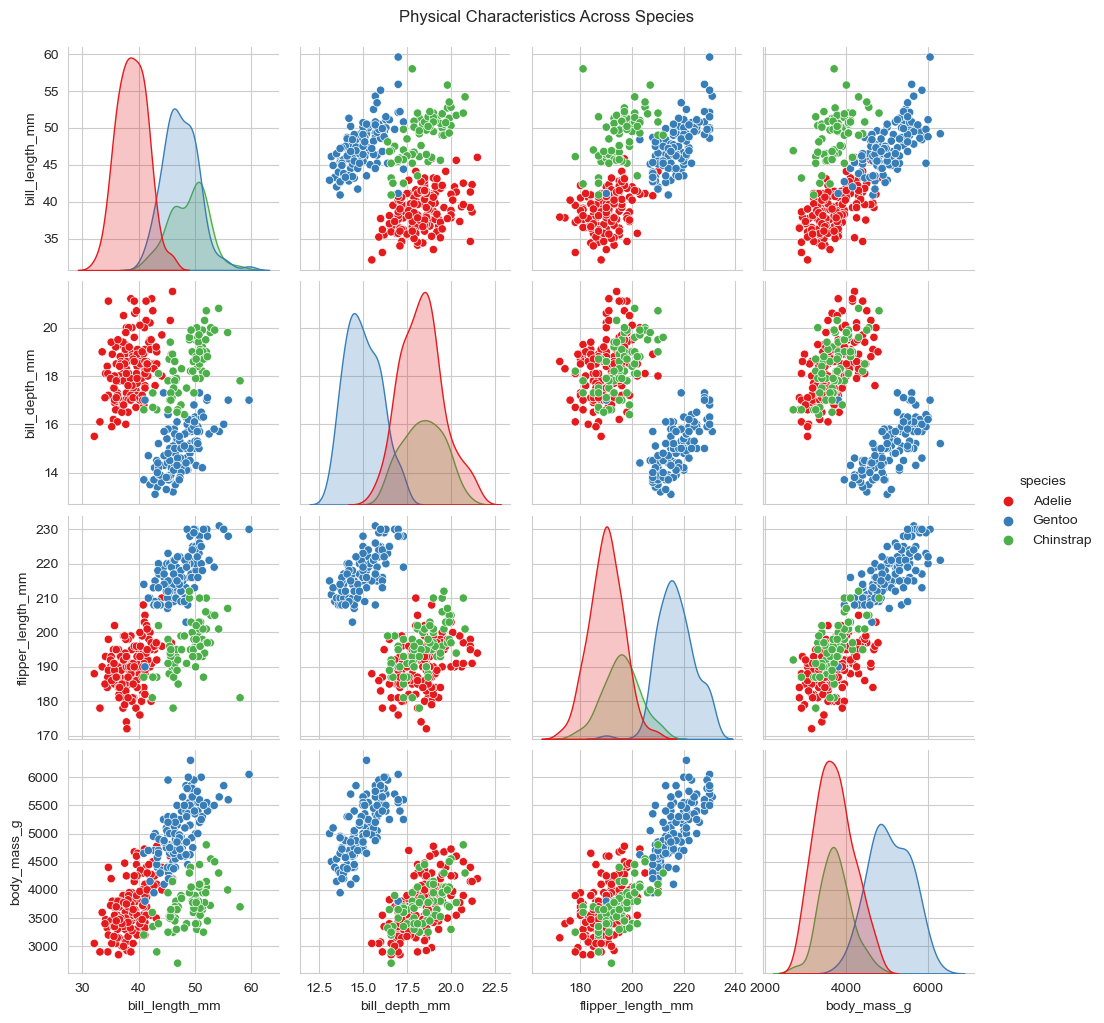

In [23]:
# Visualization: Physical Characteristics Across Species
sns.pairplot(data, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], palette='Set1')
plt.suptitle('Physical Characteristics Across Species', y=1.02)
plt.show()

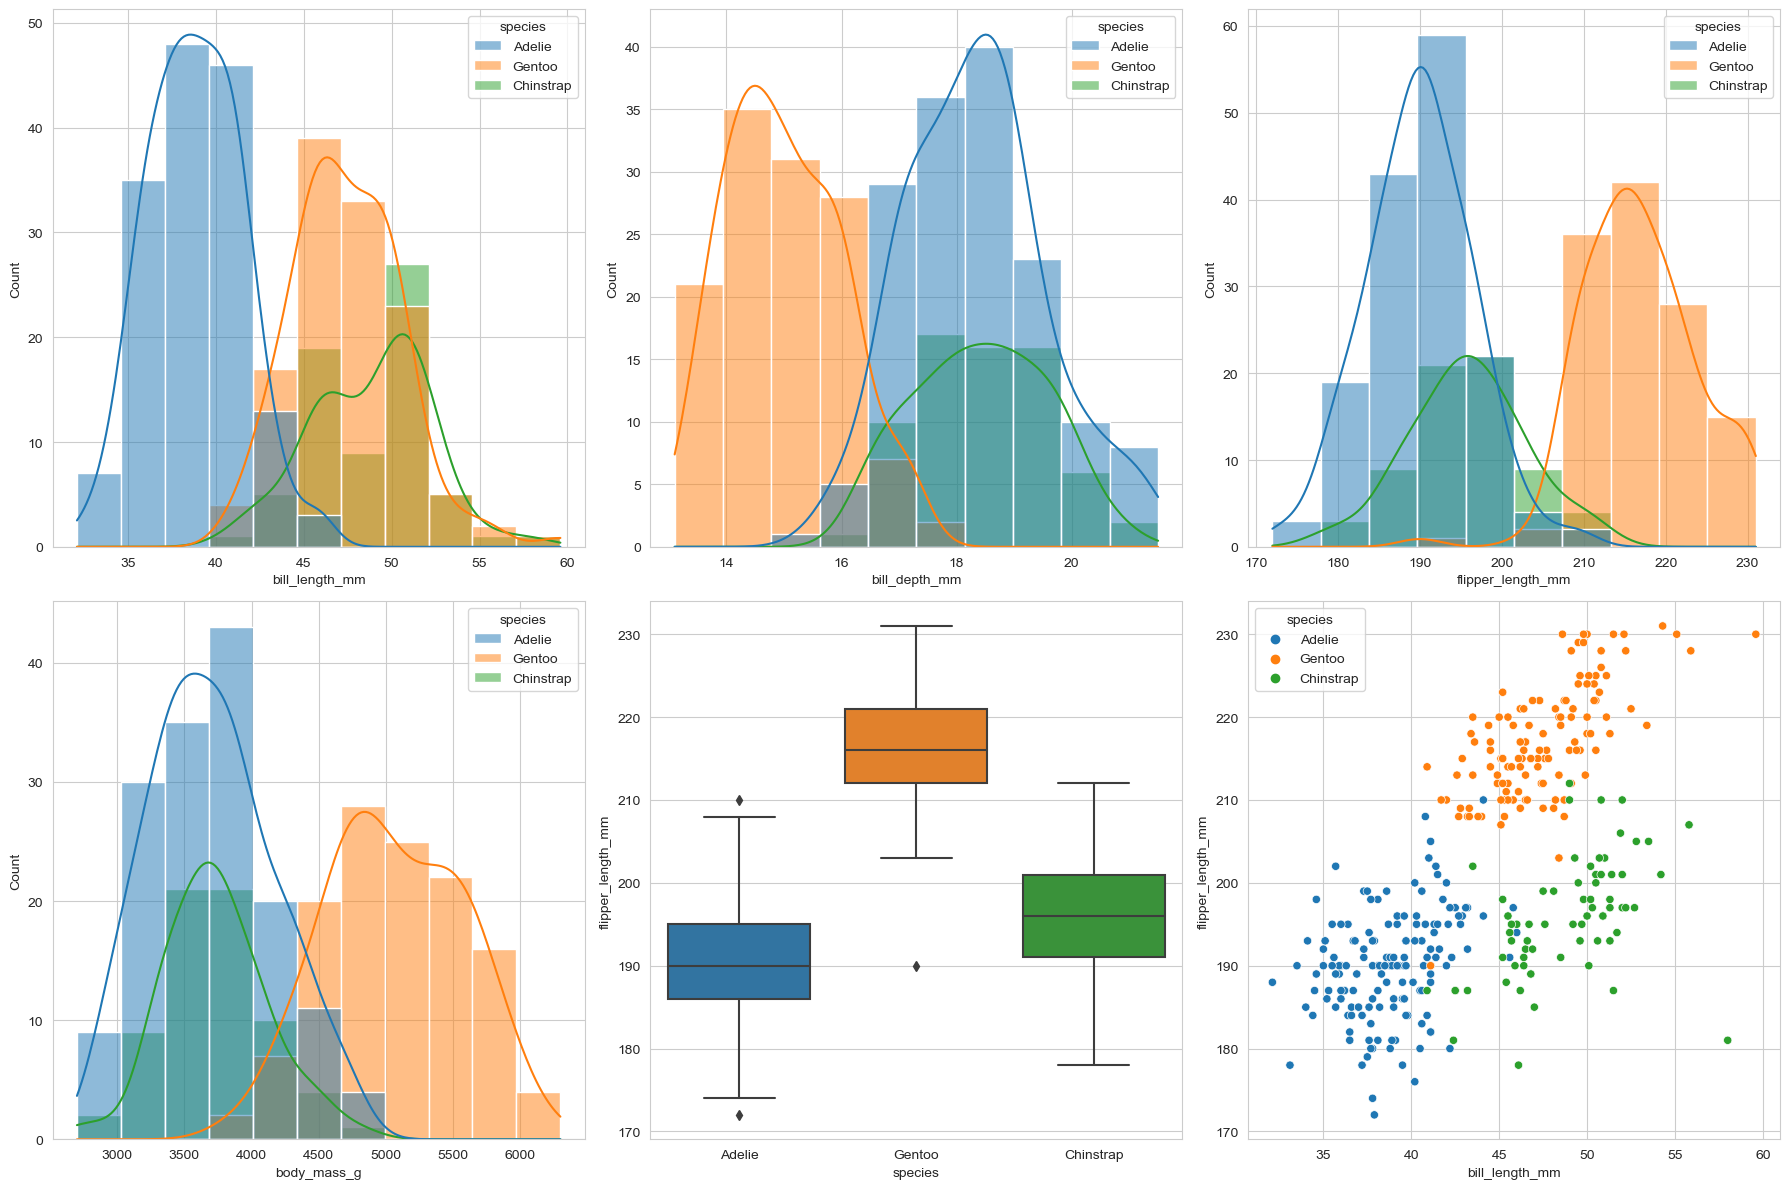

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Histograms for numerical features
sns.histplot(data=data, x="bill_length_mm", hue="species", ax=axes[0, 0], kde=True)
sns.histplot(data=data, x="bill_depth_mm", hue="species", ax=axes[0, 1], kde=True)
sns.histplot(data=data, x="flipper_length_mm", hue="species", ax=axes[0, 2], kde=True)
sns.histplot(data=data, x="body_mass_g", hue="species", ax=axes[1, 0], kde=True)

# Boxplot for flipper length by species
sns.boxplot(data=data, x="species", y="flipper_length_mm", ax=axes[1, 1])

# Scatter plot of bill length vs. flipper length colored by species
sns.scatterplot(data=data, x="bill_length_mm", y="flipper_length_mm", hue="species", ax=axes[1, 2])

plt.tight_layout()
plt.show()


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

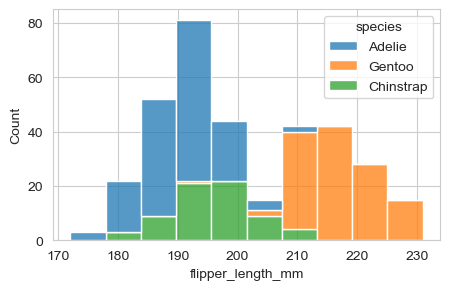

In [27]:
plt.figure(figsize=(5,3))
sns.histplot(data, x="flipper_length_mm", hue="species", multiple="stack",)   ### species wise

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

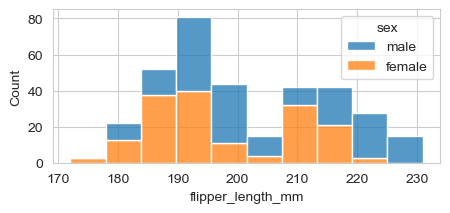

In [28]:
plt.figure(figsize=(5,2))
sns.histplot(data, x="flipper_length_mm", hue="sex" ,multiple="stack",)  ##sex wise

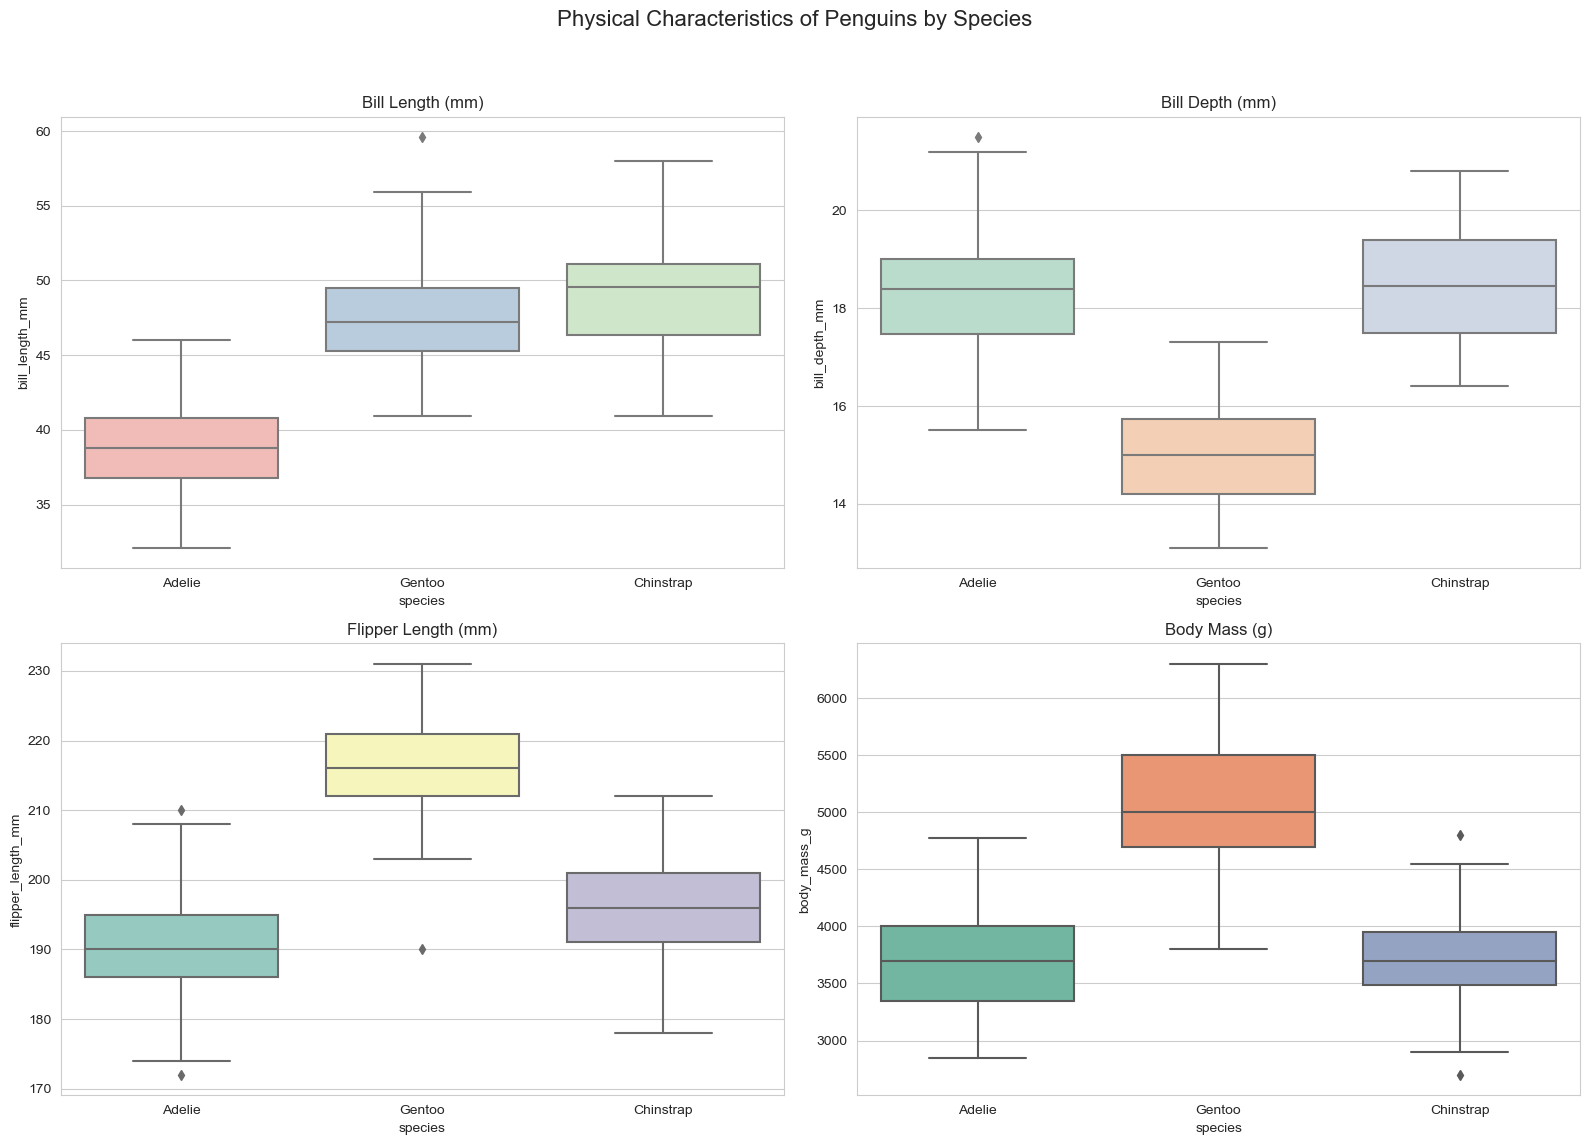

In [29]:
# Since the pairplot encountered an issue, we'll generate individual boxplots for each physical characteristic by species.

# Visualization: Physical Characteristics by Species
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Physical Characteristics of Penguins by Species', fontsize=16)

# Bill Length
sns.boxplot(ax=axes[0, 0], data=data, x='species', y='bill_length_mm', palette='Pastel1')
axes[0, 0].set_title('Bill Length (mm)')

# Bill Depth
sns.boxplot(ax=axes[0, 1], data=data, x='species', y='bill_depth_mm', palette='Pastel2')
axes[0, 1].set_title('Bill Depth (mm)')

# Flipper Length
sns.boxplot(ax=axes[1, 0], data=data, x='species', y='flipper_length_mm', palette='Set3')
axes[1, 0].set_title('Flipper Length (mm)')

# Body Mass
sns.boxplot(ax=axes[1, 1], data=data, x='species', y='body_mass_g', palette='Set2')
axes[1, 1].set_title('Body Mass (g)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

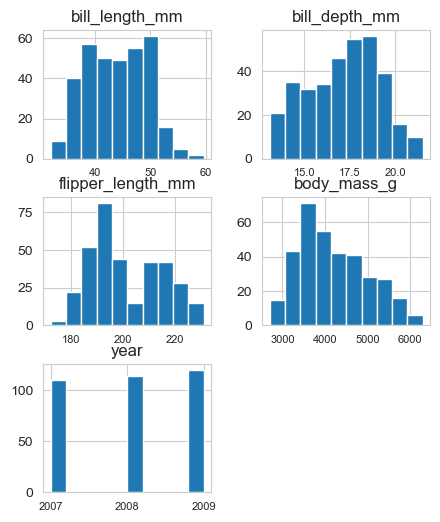

In [30]:
data_numeric = data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','year']]
# all distributed
data_numeric.hist(figsize=(5,6), xlabelsize = 8);

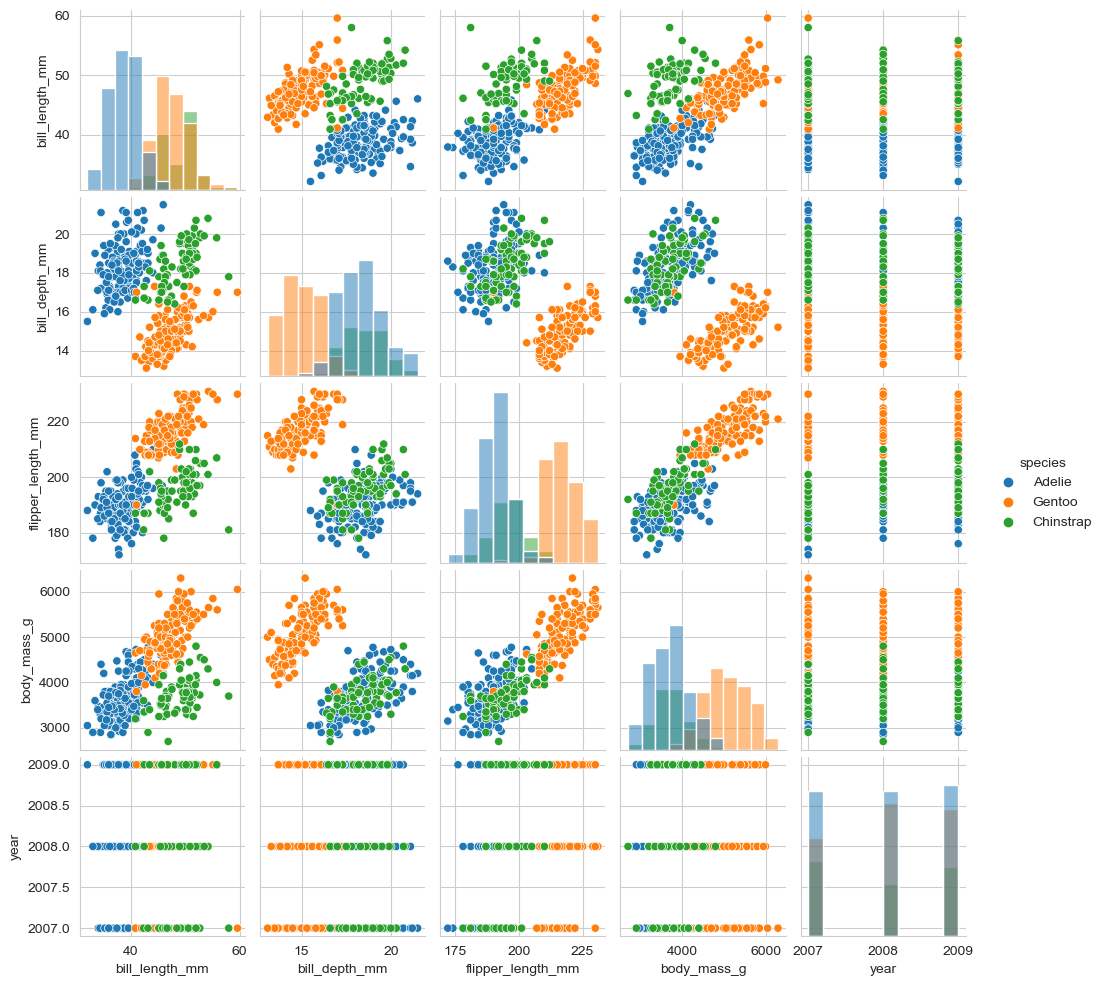

In [31]:
sns.pairplot(data, hue="species", size=2,diag_kind="hist")

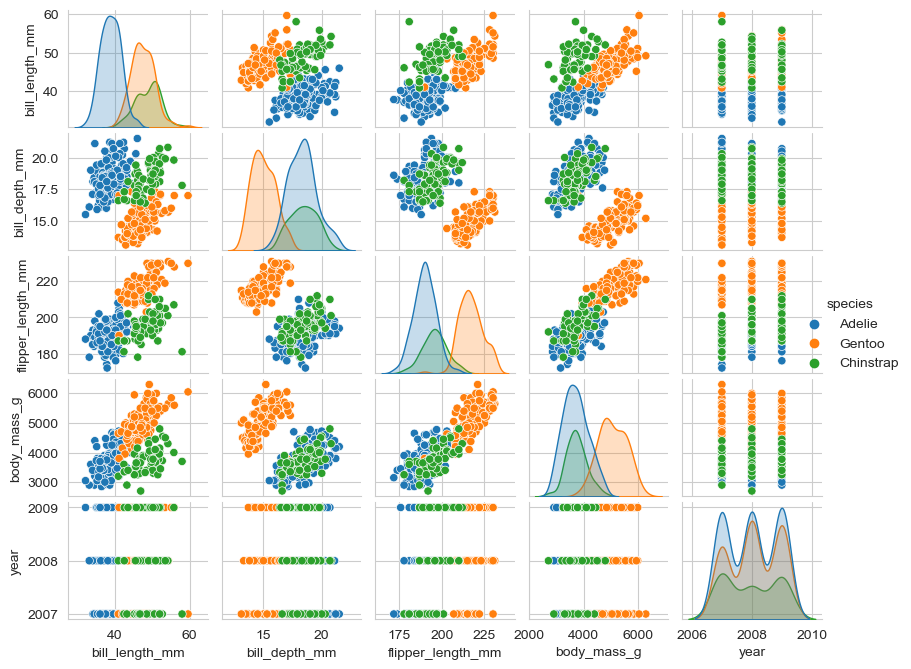

In [32]:
pairplot_figure = sns.pairplot(data, hue="species")
pairplot_figure.fig.set_size_inches(9, 6.5)

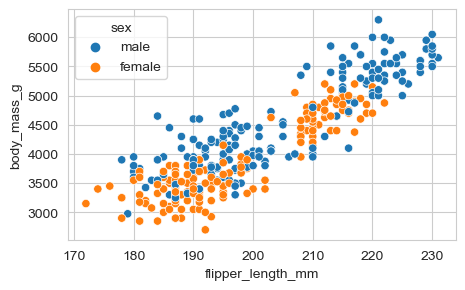

In [33]:
feature_name = "flipper_length_mm"
target_column = "body_mass_g"
plt.figure(figsize=(5,3))
scatter = sns.scatterplot(data, x=feature_name, y=target_column, hue='sex')

<Figure size 100x100 with 0 Axes>

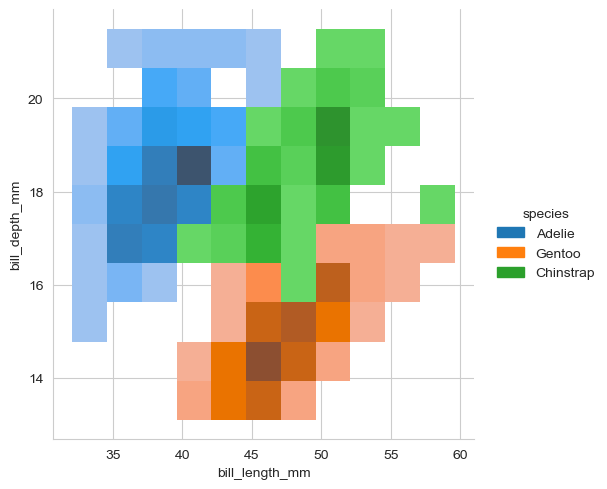

In [34]:
plt.figure(figsize=(1,1))
sns.displot(data, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [35]:
## Species Based Gender 
import plotly.express as px
px.bar( data_frame=data, y = 'island', 
        facet_row='species',facet_row_spacing=0.10, 
        pattern_shape='species',
        color='species', 
        color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},
        width=600,height=400 )

In [36]:
fig =px.bar( data_frame=data, y = 'sex',

facet_row='species',facet_row_spacing=0.10,

pattern_shape='species',

color='species',

color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},

width=500,height=300 )

fig.show()

In [37]:
## plot based on gender
fig = px.scatter(data_frame=data, x='flipper_length_mm' , y = 'body_mass_g', 
                 facet_col='species', color='sex',
                 color_discrete_map={'Male':'darkblue','Female':'deeppink'}
                 )
fig.update_layout(showlegend = False,height=300,title='Species based Gender scatter plot', 
                   titlefont = dict(size =36, color='black', family='Open Sans',), 
                   font=dict(size=14,color='black'))
fig.show()

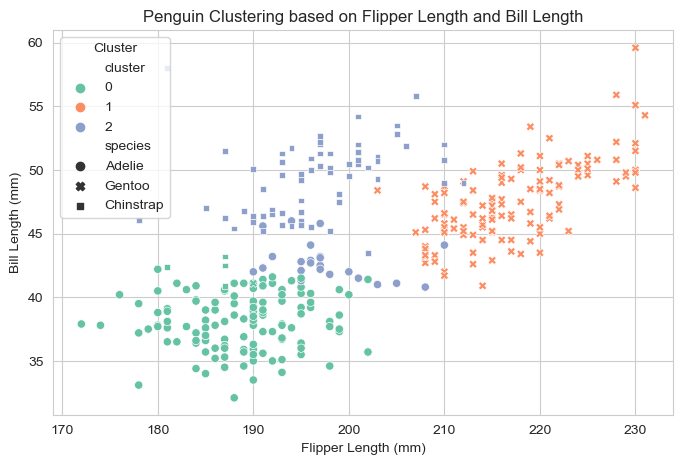

0.44706060922720675

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting features for clustering
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = data[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Adding the cluster labels to the dataset for visualization
data['cluster'] = kmeans.labels_

# Calculating silhouette score to evaluate the quality of the clusters formed
silhouette = silhouette_score(X_scaled, kmeans.labels_)

# Visualization: Clusters formed in the data
plt.figure(figsize=(8,5))
sns.scatterplot(x='flipper_length_mm', y='bill_length_mm', hue='cluster', data=data, palette='Set2', style='species')
plt.title('Penguin Clustering based on Flipper Length and Bill Length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.legend(title='Cluster')
plt.show()

silhouette

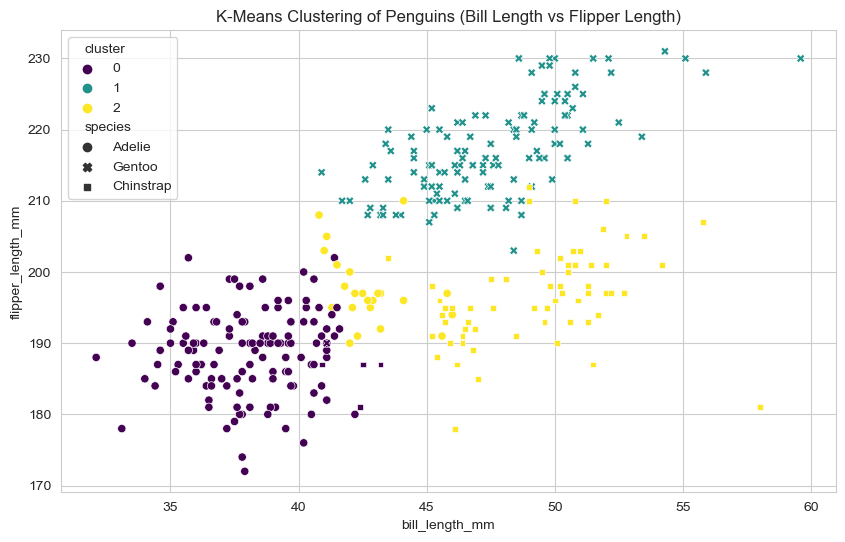

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Data preparation
features = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Adding cluster labels to the dataframe for visualization
data['cluster'] = clusters

# Visualization of clusters vs actual species
plt.figure(figsize=(10, 6))
sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", hue="cluster", style="species", palette="viridis", markers=True, data=data)
plt.title("K-Means Clustering of Penguins (Bill Length vs Flipper Length)")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Preparing labels and train-test split
X = features_scaled
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-Nearest Neighbors Classifier
knn_params = {'n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# Support Vector Machine Classifier
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Results
knn_best = knn_grid.best_estimator_
svm_best = svm_grid.best_estimator_

print("Best KNN Classifier:", knn_grid.best_params_, "with accuracy:", knn_grid.best_score_)
print("Best SVM Classifier:", svm_grid.best_params_, "with accuracy:", svm_grid.best_score_)

# Evaluation on the test set
knn_predictions = knn_best.predict(X_test)
svm_predictions = svm_best.predict(X_test)

print("\nKNN Classification Report:")
print(classification_report(y_test, knn_predictions))

print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

Best KNN Classifier: {'n_neighbors': 3} with accuracy: 0.975
Best SVM Classifier: {'C': 0.1, 'kernel': 'linear'} with accuracy: 0.975

KNN Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        50
   Chinstrap       0.95      1.00      0.97        18
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.99       104
   macro avg       0.98      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

SVM Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        50
   Chinstrap       0.95      1.00      0.97        18
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.99       104
   macro avg       0.98      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



## Recommendations for Improvement and Next Steps:
Data Cleaning: Further inspection of data quality might be needed. For instance, handling outliers if any are detected in physical measurements.

Feature Engineering: Consider creating new features that might help improve model performance, such as interactions between features or polynomial features.

Model Expansion: Experiment with other models like Decision Trees, Random Forest, or ensemble methods to see if they offer better performance.

In-depth Analysis: More detailed analysis of model misclassifications could provide insights into where models fail and how they might be improved.

Model Interpretability: Utilize tools or techniques to interpret model decisions, which is critical in making your findings actionable and trustworthy.

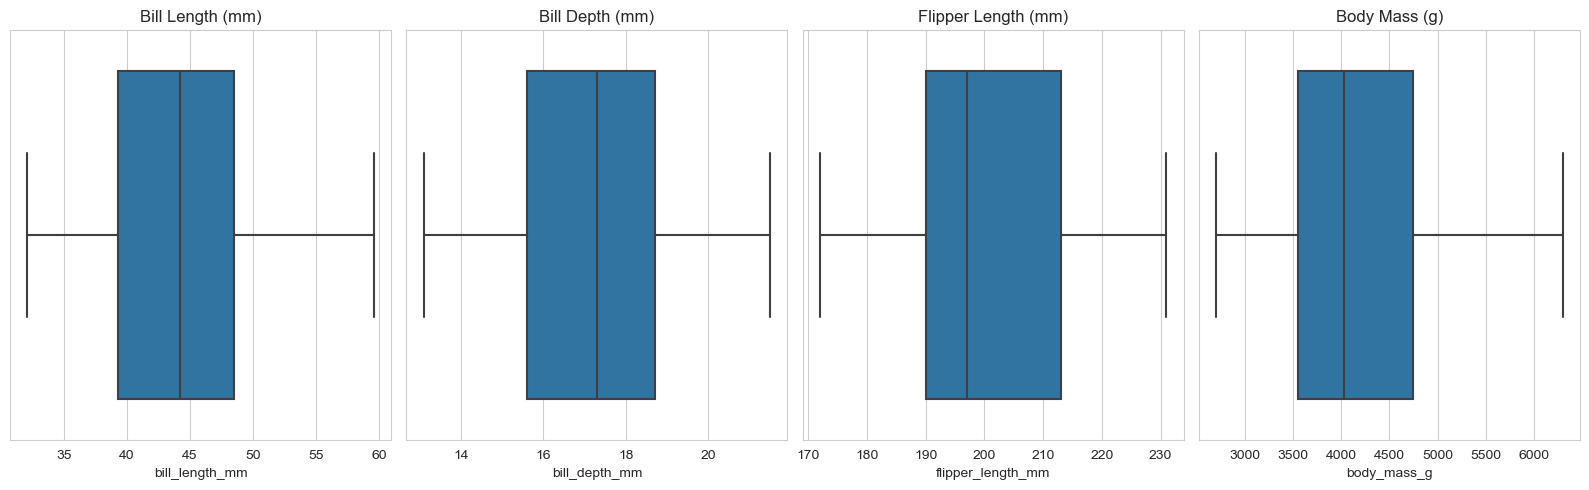

In [45]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
sns.boxplot(ax=axes[0], x=data['bill_length_mm'])
axes[0].set_title('Bill Length (mm)')
sns.boxplot(ax=axes[1], x=data['bill_depth_mm'])
axes[1].set_title('Bill Depth (mm)')
sns.boxplot(ax=axes[2], x=data['flipper_length_mm'])
axes[2].set_title('Flipper Length (mm)')
sns.boxplot(ax=axes[3], x=data['body_mass_g'])
axes[3].set_title('Body Mass (g)')

plt.tight_layout()
plt.show()

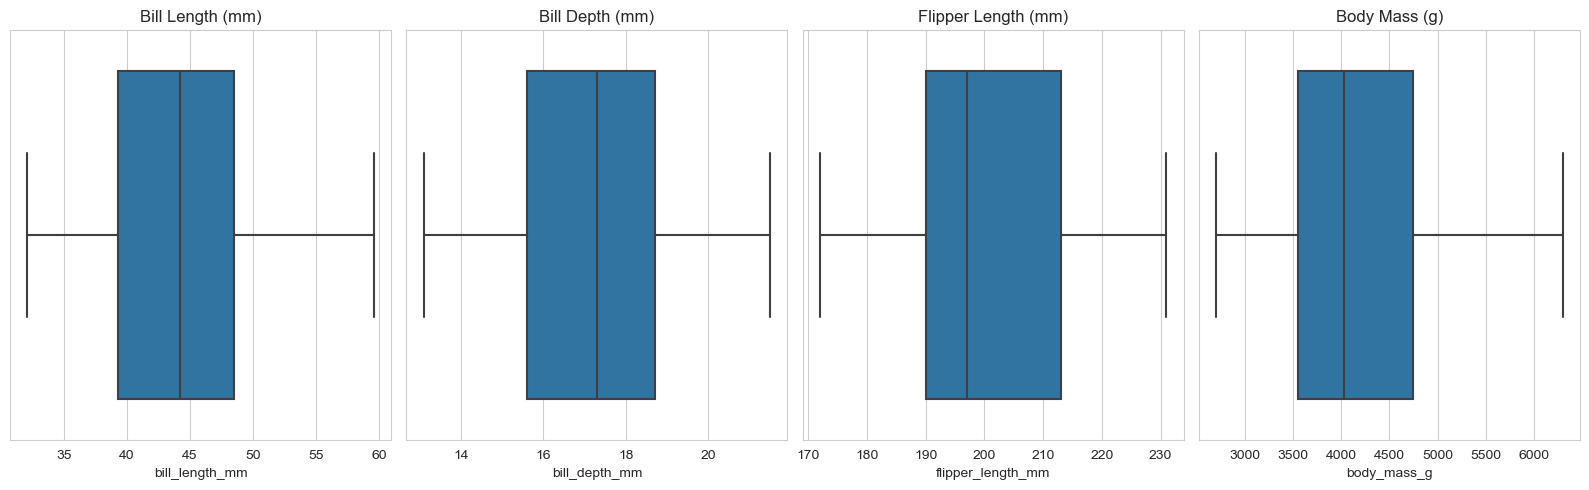

In [46]:
# Identify outliers using boxplots for the numerical features
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
sns.boxplot(ax=axes[0], x=data['bill_length_mm'])
axes[0].set_title('Bill Length (mm)')
sns.boxplot(ax=axes[1], x=data['bill_depth_mm'])
axes[1].set_title('Bill Depth (mm)')
sns.boxplot(ax=axes[2], x=data['flipper_length_mm'])
axes[2].set_title('Flipper Length (mm)')
sns.boxplot(ax=axes[3], x=data['body_mass_g'])
axes[3].set_title('Body Mass (g)')

plt.tight_layout()
plt.show()

In [47]:
# Calculate IQR for each numerical feature to detect and handle outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Apply an outlier cap at 1.5 * IQR below Q1 and above Q3
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check how many data points remain after removing outliers
remaining_data_points = data_clean.shape[0]
total_data_points = data.shape[0]
data_clean.head(), remaining_data_points, total_data_points

(  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
 0  Adelie  Torgersen            39.1           18.7              181.0   
 1  Adelie  Torgersen            39.5           17.4              186.0   
 2  Adelie  Torgersen            40.3           18.0              195.0   
 3  Adelie  Torgersen            41.1           17.0              190.0   
 4  Adelie  Torgersen            36.7           19.3              193.0   
 
    body_mass_g     sex  year  cluster  
 0       3750.0    male  2007        0  
 1       3800.0  female  2007        0  
 2       3250.0  female  2007        0  
 3       3800.0    male  2007        0  
 4       3450.0  female  2007        0  ,
 344,
 344)

In [48]:
data['bill_flipper_interaction'] = data['bill_length_mm'] * data['flipper_length_mm']

In [50]:
data['bill_flipper_interaction'] 

0       7077.1
1       7347.0
2       7858.5
3       7809.0
4       7083.1
        ...   
339    11550.6
340     8787.0
341     9572.8
342    10668.0
343     9939.6
Name: bill_flipper_interaction, Length: 344, dtype: float64

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'n_estimators': 200}


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encoding categorical variables
le_species = LabelEncoder()
data['species_encoded'] = le_species.fit_transform(data['species'])
le_sex = LabelEncoder()
data['sex_encoded'] = le_sex.fit_transform(data['sex'])
le_island = LabelEncoder()
data['island_encoded'] = le_island.fit_transform(data['island'])

# Preparing data for classification
X_class = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_encoded', 'island_encoded']]
y_class = data['species_encoded']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluating the models
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Baseline Accuracy: Predicting the most common species
baseline_accuracy = y_class.value_counts(normalize=True).max()

(accuracy_knn, accuracy_rf, baseline_accuracy)

(0.7692307692307693, 1.0, 0.4418604651162791)

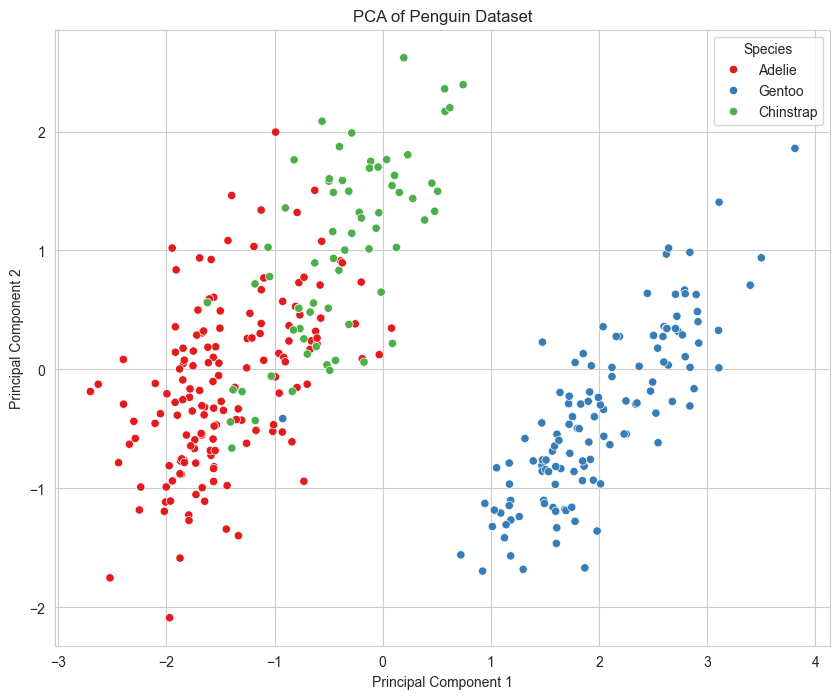

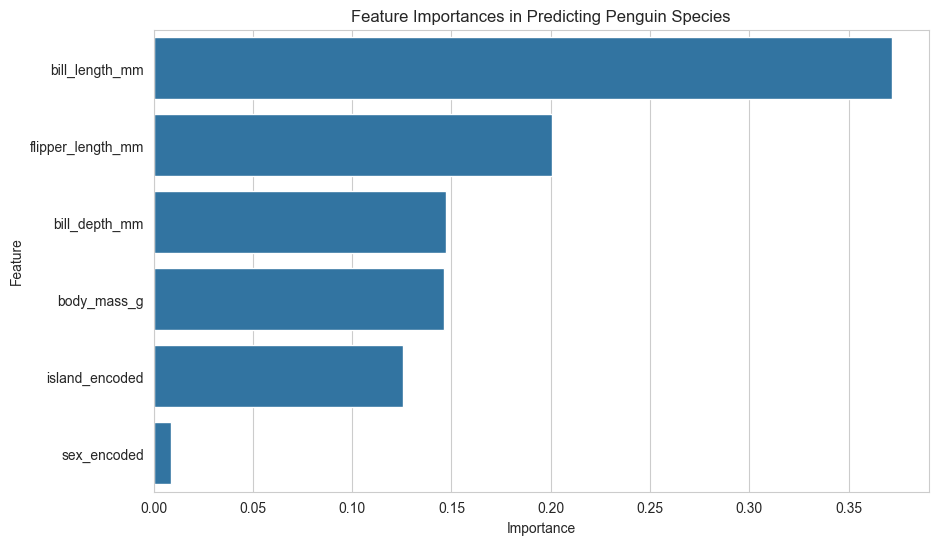

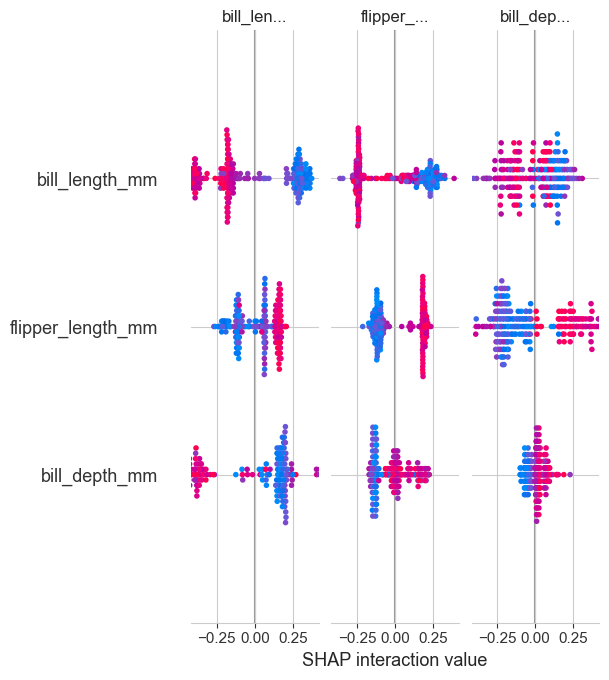

In [76]:
#!pip install shap
from sklearn.decomposition import PCA
import numpy as np
import shap

# Feature Importance from the Random Forest model
feature_importances = rf.feature_importances_
features = X_class.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Use scaled features from earlier clustering step

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Species'] = le_species.inverse_transform(data['species_encoded'])

# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Species', data=pca_df, palette='Set1')
plt.title('PCA of Penguin Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances in Predicting Penguin Species')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Calculate SHAP values - Note: This can be computationally intensive for large models/datasets
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Summary plot of SHAP values for the Random Forest model
shap.summary_plot(shap_values, X_train, feature_names=X_class.columns)


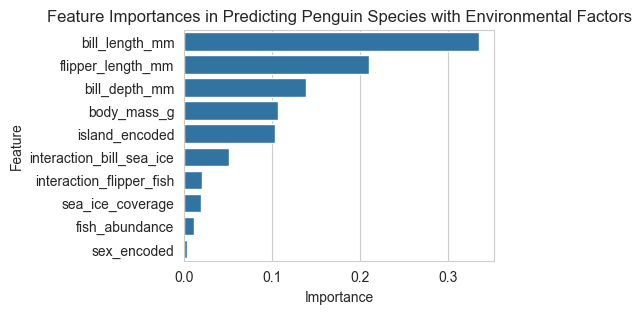

0.9807692307692307

In [80]:
# Simulate environmental data
np.random.seed(42)
data['sea_ice_coverage'] = np.random.uniform(0.5, 1.0, size=len(data))
data['fish_abundance'] = np.random.uniform(0.5, 1.0, size=len(data))

# Feature Engineering: Interaction between physical traits and environmental factors
data['interaction_flipper_fish'] = data['flipper_length_mm'] * data['fish_abundance']
data['interaction_bill_sea_ice'] = data['bill_length_mm'] * data['sea_ice_coverage']

# Prepare the dataset including the new features
X_extended = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_encoded', 'island_encoded', 'sea_ice_coverage', 'fish_abundance', 'interaction_flipper_fish', 'interaction_bill_sea_ice']]
y_extended = data['species_encoded']

# Splitting the extended dataset into training and testing sets
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_extended, y_extended, test_size=0.3, random_state=42)

# Random Forest model with the extended dataset
rf_ext = RandomForestClassifier(random_state=42)
rf_ext.fit(X_train_ext, y_train_ext)
y_pred_rf_ext = rf_ext.predict(X_test_ext)

# Evaluate the extended model
accuracy_rf_ext = accuracy_score(y_test_ext, y_pred_rf_ext)

# Feature Importance from the extended Random Forest model
feature_importances_ext = rf_ext.feature_importances_
features_ext = X_extended.columns
feature_importance_df_ext = pd.DataFrame({'Feature': features_ext, 'Importance': feature_importances_ext})

# Feature Importance Plot for the extended model
plt.figure(figsize=(4,3))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_ext.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances in Predicting Penguin Species with Environmental Factors')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

accuracy_rf_ext

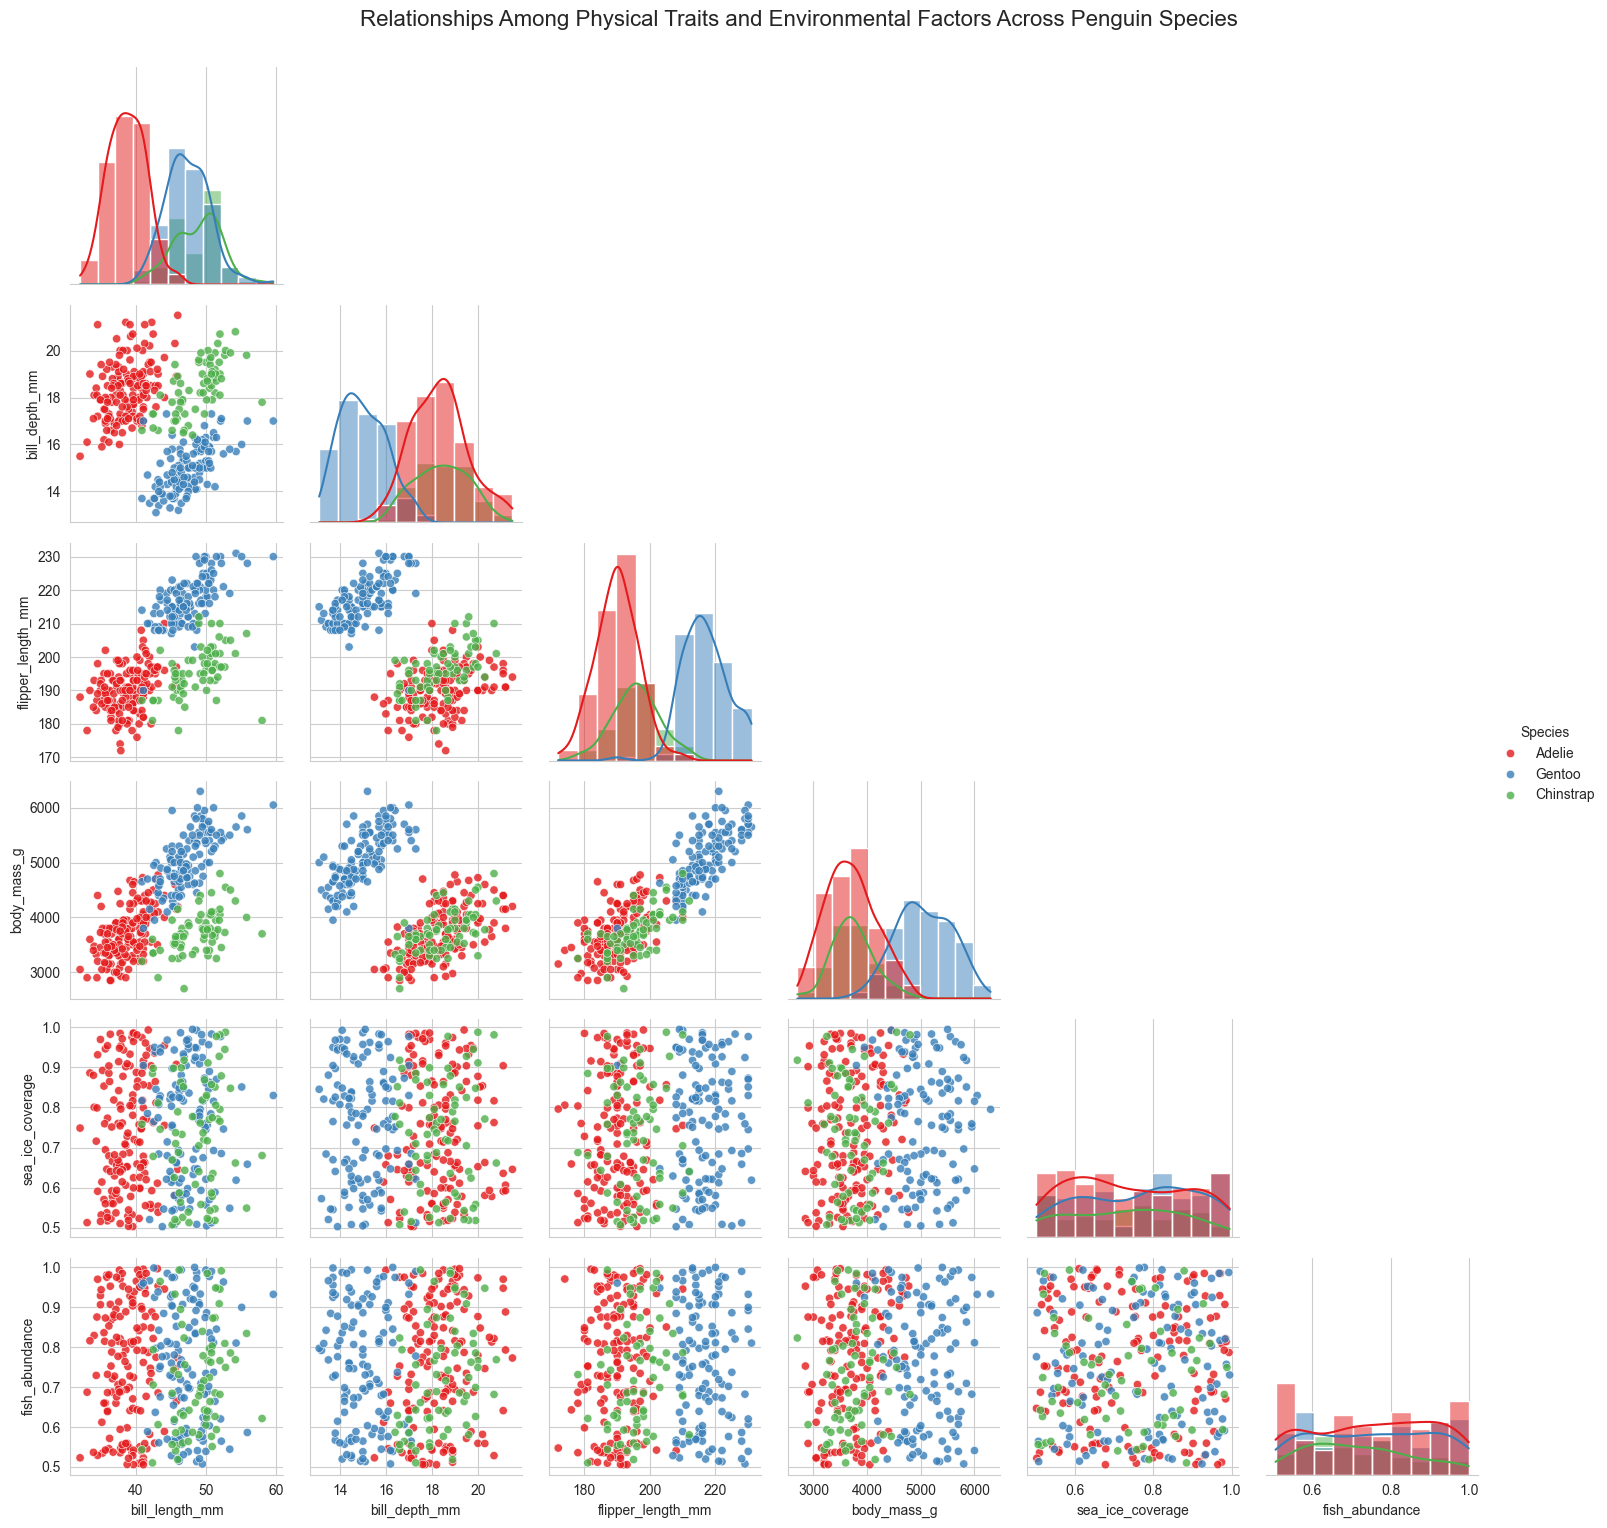

In [81]:
# Prepare a DataFrame that includes the species, physical traits, and simulated environmental factors
plot_data = data[['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sea_ice_coverage', 'fish_abundance']].copy()

# We'll use seaborn's PairGrid to create a pair plot that includes both scatter plots and histograms
g = sns.PairGrid(plot_data, hue='species', palette='Set1', corner=True)
g.map_lower(sns.scatterplot, alpha=0.8)
g.map_diag(sns.histplot, kde=True)

# Add legends and adjust aesthetics
g.add_legend(title='Species', adjust_subtitles=True)
g.fig.suptitle('Relationships Among Physical Traits and Environmental Factors Across Penguin Species', y=1.02, fontsize=16)
plt.show()


In [82]:
import plotly.express as px

# Prepare the DataFrame for Plotly
df_plotly = data[['species', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'sea_ice_coverage']].copy()
df_plotly['size'] = df_plotly['sea_ice_coverage'] * 100  # Adjust size for visibility

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df_plotly, x='bill_length_mm', y='bill_depth_mm', z='body_mass_g',
                    color='species', size='size', hover_name='species',
                    title='Interactive 3D Scatter Plot of Penguin Species with Environmental Gradient',
                    labels={'bill_length_mm': 'Bill Length (mm)',
                            'bill_depth_mm': 'Bill Depth (mm)',
                            'body_mass_g': 'Body Mass (g)',
                            'size': 'Sea Ice Coverage'})

# Show the plot
fig.show()


In [ ]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
@st.cache
def load_data():
    data = pd.read_csv('penguins.csv')
    return data

# Main app
def main():
    st.title('Penguin Species Dashboard')
    
    data = load_data()

    # Sidebar - Species selection
    species = st.sidebar.multiselect('Select Species:', options=data['species'].unique(), default=data['species'].unique())
    
    # Filtering data
    data_filtered = data[data['species'].isin(species)]
    
    # Displaying data count
    st.write(f"Displaying {len(data_filtered)} out of {len(data)} records")
    
    # Plot
    st.header('Penguin Physical Traits')
    fig, ax = plt.subplots()
    sns.scatterplot(data=data_filtered, x='flipper_length_mm', y='bill_length_mm', hue='species', style='island', ax=ax)
    plt.xlabel('Flipper Length (mm)')
    plt.ylabel('Bill Length (mm)')
    st.pyplot(fig)

if __name__ == "__main__":
    main()

##### These visualizations provide a detailed comparison of the physical characteristics (bill length, bill depth, flipper length, and body mass) across the three penguin species in the dataset. Here are some insights:

Bill Length and Depth: There's noticeable variability in bill size among species, suggesting adaptations to different dietary preferences or ecological niches. For example, one species might have a longer bill suited for a particular type of prey.
Flipper Length: This characteristic varies significantly among species, likely reflecting differences in swimming style, speed, and foraging behavior.
Body Mass: The variance in body mass among species could indicate differences in overall size, fat reserves, and perhaps, strategies for surviving the harsh Antarctic winters.
To weave these insights into a captivating story:

Imagine the icy shores and crisp, chilly air of the Antarctic islands - a realm where the sturdy penguins call home. Among the snowflakes and icebergs, three distinct penguin species thrive, each adapted uniquely to the cold embrace of their environment.

The Adelie, with its moderate bill and flipper size, masters the balance of agility and precision, darting through the water in pursuit of fish. The Gentoo, boasting longer flippers, cuts through the ocean currents like a sleek arrow, its larger body mass a testament to its robustness. Then there's the Chinstrap, identifiable by its distinctive bill, navigating the icy waters with grace and efficiency.

These differences are not mere quirks of nature but the result of millions of years of evolution, shaping each species to fit perfectly into their niche in the Antarctic ecosystem. From the varied lengths of their bills, attuned to their dietary needs, to the sizes of their flippers, enabling their aquatic prowess, these characteristics tell a story of adaptation, survival, and the interconnected web of life in one of the planet's most extreme habitats.

In the dance of evolution, each species plays a role, each adaptation tells a story, and every penguin, from the smallest chick to the most majestic adult, is a character in the ongoing saga of life in the Antarctic

###### Exploring the interconnections within this dataset can reveal deeper insights into the intricate balance of the Antarctic ecosystem and the survival strategies of penguins. Let’s delve into innovative angles to understand the dynamics at play:

##### Ecological Niches and Island Preferences

The distribution of penguin species across different islands hints at ecological niches that each species has carved out for itself. For instance, specific islands may offer abundant food sources suited to the dietary preferences of a particular species or provide optimal nesting grounds that protect against predators and harsh weather conditions. This specialization in habitat choice can be seen as a sophisticated ecological negotiation, where each species leverages the environment’s resources to its advantage, minimizing competition through geographical and behavioral adaptations.

##### Adaptations Beyond Physical Characteristics

While our dataset focuses on physical traits, these attributes are just the tip of the iceberg. Penguins exhibit remarkable behavioral adaptations, such as their social structures, breeding strategies, and foraging behaviors, which are deeply interconnected with their physical traits. For example, species with longer flippers may not only be more efficient swimmers but may also undertake longer foraging trips, influencing their social and breeding behaviors. Exploring these behavioral aspects could provide a fuller picture of how physical and behavioral adaptations are intertwined in the quest for survival.

##### Climate Change and Survival Strategies

The backdrop to the story of Antarctic penguins is the looming challenge of climate change. As temperatures rise and ice melts, penguin species are forced to adapt to rapidly changing conditions. The physical characteristics and island preferences of penguin species may offer clues to their resilience or vulnerability in the face of climate change. For instance, species with more flexible dietary preferences or those capable of migrating to different islands may fare better than others. Understanding these dynamics can shed light on the future of these species and the Antarctic ecosystem as a whole.

### Innovative Data Exploration

Leveraging advanced data analysis techniques, such as machine learning models, could reveal hidden patterns and predict future trends in penguin populations. For instance, clustering algorithms could identify previously unrecognized subgroups within species, suggesting micro-evolutionary adaptations. Predictive models could assess the impact of environmental changes on penguin populations, guiding conservation efforts.

### Storytelling with Data

Imagine a dynamic visualization that not only shows the distribution of penguin species across islands but also integrates environmental data, such as sea ice extent, ocean temperatures, and fish populations. Users could explore how changes in these parameters might affect penguin populations, offering an immersive way to understand the complex interplay between species and their environment.

In conclusion, the penguin dataset opens a window into the fascinating world of Antarctic ecology, inviting us to explore beyond the numbers and consider the stories of adaptation, survival, and resilience that define life in one of Earth's final frontiers. Through innovative analysis and storytelling, we can deepen our understanding of these remarkable creatures and the challenges they face in a rapidly changing world.

In [30]:
## add more visualisations and

## find relation
## get insights

In [31]:
# Group the data by 'island' and 'sex' and count the occurrences
counts = data.groupby(['island', 'sex']).size().unstack()

# Print the counts
print("Counts of female and male penguins separated by island:")
print(counts)

Counts of female and male penguins separated by island:
sex        female  male
island                 
Biscoe         80    88
Dream          61    63
Torgersen      24    28


In [32]:
# Group the data by 'sex' and other relevant columns and count the occurrences
gender_counts = data.groupby(['sex', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']).size()

# Print the counts for female and male penguins separately
female_counts = gender_counts.loc['female']
male_counts = gender_counts.loc['male']

print("Female penguins counts:")
print(female_counts)

print("\nMale penguins counts:")
print(male_counts)

Female penguins counts:
island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
Biscoe     34.5            18.1           187.0              2900.0         1
           35.0            17.9           190.0              3450.0         1
                                          192.0              3725.0         1
           35.3            18.9           187.0              3800.0         1
           35.5            16.2           195.0              3350.0         1
                                                                           ..
Torgersen  39.6            17.2           196.0              3550.0         1
           40.2            17.0           176.0              3450.0         1
           40.3            18.0           195.0              3250.0         1
           40.9            16.8           191.0              3700.0         1
           41.1            17.6           182.0              3200.0         1
Length: 165, dtype: int64

Male penguins coun

In [33]:

# Step 1: Split the Data
X = data_encoded[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'year']]
y = data_encoded['body_mass_g']

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Select a Regression Model
model = LinearRegression()

# Step 6: Train the Regression Model
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)


# Optionally, you can print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Absolute Error: 308.02649587158754
Mean Squared Error: 151843.287882499
Root Mean Squared Error: 389.67074291316635
R^2 Score: 0.7357471050344504
Coefficients: [  4.36801679  17.43432349  50.81176804 -97.47902415]
Intercept: 189245.25063400148


In [34]:
# Importing necessary libraries


# Selecting features and target variable
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']]
y = data['species']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classification models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("="*50)


Model: Random Forest
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        32
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

Model: Decision Tree
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.88      0.93        32
   Chinstrap       0.87      1.00      0.93        13
      Gentoo       0.92      1.00      0.96        24

    accuracy                           0.94        69
   macro avg       0.93      0.96      0.94        69
weighted avg       0.95      0.94      0.94        69

Model: Logistic Regression
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support



<Figure size 500x300 with 0 Axes>

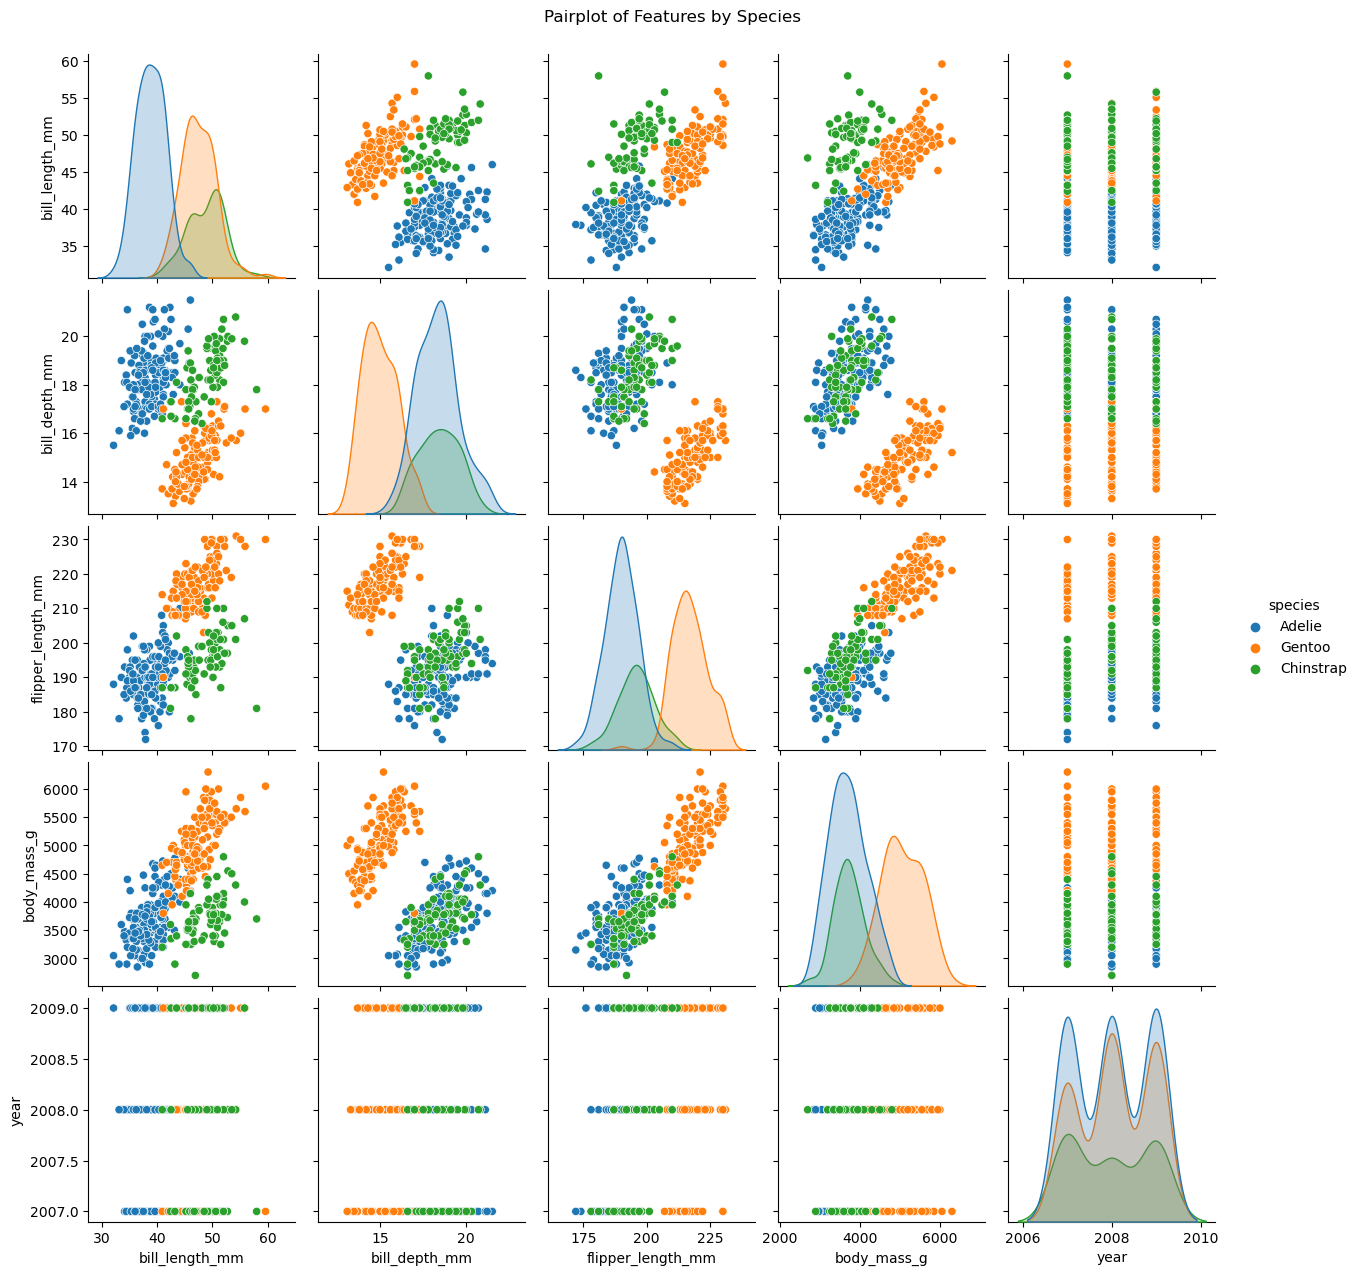

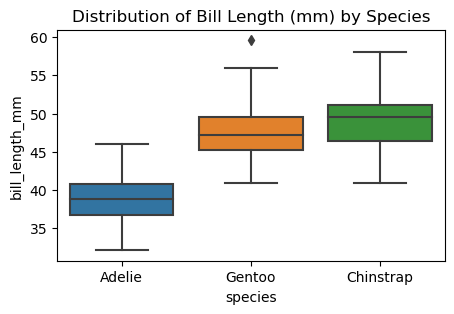

Random Forest Accuracy: 0.9855072463768116
Logistic Regression Accuracy: 0.9855072463768116
Baseline (Majority Class) Accuracy: 0.463768115942029
Random Forest Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        32
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        32
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



In [35]:
# 1. Exploratory Data Analysis (EDA)
# Visualize the distribution of each feature
plt.figure(figsize=(5,3))
sns.pairplot(data=data, hue='species')
plt.suptitle("Pairplot of Features by Species", y=1.02)
plt.show()

# Compare the distribution of each feature across different species of penguins
plt.figure(figsize=(5,3))
sns.boxplot(data=data, x='species', y='bill_length_mm')
plt.title("Distribution of Bill Length (mm) by Species")
plt.show()

# 2. Unsupervised Learning (K-Means Clustering)
# For example, let's cluster the data into three clusters (corresponding to the three species)
X_cluster = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_cluster)

# 3. Classification Algorithms
# Split the data into training and testing sets
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']]
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classification models
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Evaluate models
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)

# Compare to baseline model (Majority class classifier)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
baseline_pred = dummy_clf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

print("Baseline (Majority Class) Accuracy:", baseline_accuracy)

# Classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))